## requests 라이브러리 사용법

In [1]:
# 라이브러리 불러오기

import requests as req
# 서버에게 데이터를 요청 및 응답받기 위한 라이브러리

In [4]:
res = req.get("https://www.naver.com/")
res

# Response [200]번대 : 성공적으로 요청 및 응답이 이루어졌다는 의미
# Response [400]번대 : 클라이언트(요청) 부분에서 오류가 발생했을 때
# Response [500]번대 : 서버(응답) 쪽에서 오류가 발생했을 때

<Response [200]>

In [5]:
res.text
# html 문서가 문자열 형태로 가져와졌다.

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

In [7]:
# 실습 : 같은 방법으로 멜론 페이지 가져오기

req.get("https://www.melon.com/index.htm")

<Response [406]>

In [13]:
# 406 에러가 나왔다! --> 400번대 오류(클라이언트 부분에서 오류가 났다!)
# 멜론 페이지에서 파이썬 코드로 접근하는 것을 막고 있기 때문에
# 사람이 접속하는 것처럼 속이는 작업(우회 접속)

h = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'}

In [14]:
req.get('https://www.melon.com/index.htm', headers = h)
# User-Agent를 이용한 우회 접속 방법
# 페이지 불러오기 -> 코드에 오류가 있지 않은데도 400번대 오류가 나면
# 우회 접속할 필요가 있다!
# F12 버튼(개발자 도구) Network 탭으로 접근!
# F5 눌러서 새로고침 한 후 Document 타입의 html 문서정보로 접근
# html 문서정보 클릭 후 User-Agent에 대한 정보를 복사해서
# 파이썬 코드에 딕셔너리 형태({})로 저장해준 다음
# 페이지를 불러올 때 heaers 값에 집어 넣어주면 끝!

<Response [200]>

### BeautifulSoup 라이브러리 불러오기

In [15]:
from bs4 import BeautifulSoup as bs
# 컴퓨터가 이해할 수 있는 파이썬 객체 형태로 변환해주는 라이브러리

In [17]:
res = req.get('https://www.kakaocorp.com/page/service/service/KakaoTalk')
res

<Response [200]>

In [19]:
res.text

'<!doctype html><html data-n-head-ssr lang="ko" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ko%22%7D%7D"><head ><script>!function(e,t,n,c,o,a,f){e.fbq||(o=e.fbq=function(){o.callMethod?o.callMethod.apply(o,arguments):o.queue.push(arguments)},e._fbq||(e._fbq=o),o.push=o,o.loaded=!0,o.version="2.0",o.queue=[],(a=t.createElement(n)).async=!0,a.src="https://connect.facebook.net/en_US/fbevents.js",(f=t.getElementsByTagName(n)[0]).parentNode.insertBefore(a,f))}(window,document,"script"),fbq("init","506344193746714"),fbq("track","PageView")</script><noscript><img height="1" width="1" style="display:none" src="https://www.facebook.com/tr?id=506344193746714&ev=PageView&noscript=1"></noscript><script>!function(e,t,a,n,g){e[n]=e[n]||[],e[n].push({"gtm.start":(new Date).getTime(),event:"gtm.js"});var m=t.getElementsByTagName(a)[0],r=t.createElement(a);r.async=!0,r.src="https://www.googletagmanager.com/gtm.js?id=GTM-MQ23PRPS",m.parentNode.insertBefore(r,m)}(window,document,"script","dataLayer")</scr

In [25]:
# bs(parsing할 html 문서, 'parsing할 방법')
# 파이썬에서 제공하는 parsing 방법은 총 4가지
# lxml : 빠르고 관대하기 때문에

soup = bs(res.text, 'lxml') # 파이썬 객체 형태로 변환!
soup

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ko%22%7D%7D" data-n-head-ssr="" lang="ko"><head><script>!function(e,t,n,c,o,a,f){e.fbq||(o=e.fbq=function(){o.callMethod?o.callMethod.apply(o,arguments):o.queue.push(arguments)},e._fbq||(e._fbq=o),o.push=o,o.loaded=!0,o.version="2.0",o.queue=[],(a=t.createElement(n)).async=!0,a.src="https://connect.facebook.net/en_US/fbevents.js",(f=t.getElementsByTagName(n)[0]).parentNode.insertBefore(a,f))}(window,document,"script"),fbq("init","506344193746714"),fbq("track","PageView")</script><noscript><img height="1" src="https://www.facebook.com/tr?id=506344193746714&amp;ev=PageView&amp;noscript=1" style="display:none" width="1"/></noscript><script>!function(e,t,a,n,g){e[n]=e[n]||[],e[n].push({"gtm.start":(new Date).getTime(),event:"gtm.js"});var m=t.getElementsByTagName(a)[0],r=t.createElement(a);r.async=!0,r.src="https://www.googletagmanager.com/gtm.js?id=GTM-MQ23PRPS",m.parentNode.insertBefore(r,m)}(window,document,"script","dataL

#### 카카오톡 페이지 정보를 가져와보자
 - 카카오톡 페이지에서 글자를 수집해보자

##### 카톡 안녕가이드 라는 글자를 수집
##### 태그의 위치를 찾는 방법
##### 1. 내가 가져오고 싶은 contents 위에 마우스를 올려두고 우클릭 -> 검사
##### 2. 개발자 모드 상단에 커서 모양 아이콘 클릭 후 가져오고 싶은 컨텐츠 클릭

In [26]:
# 카톡 안녕 가이드라는 글자는 어떤 태그 안에?
# a 태그 가져오는 방법

soup.select('a')
# 페이지에 있는 모든 a태그가 전부 가져와졌다.

[<a data-v-c79a9530="" href="#mainContent">본문 바로가기</a>,
 <a data-v-c79a9530="" href="#gnbContent">메뉴 바로가기</a>,
 <a data-v-5c1be6e5="" href="/page"><span class="screen_out" data-v-5c1be6e5="">KaKao</span><!-- --></a>,
 <a data-v-5c1be6e5="" href="/page"><span class="screen_out" data-v-5c1be6e5="">KaKao</span><!-- --></a>,
 <a aria-expanded="false" data-v-5c1be6e5="" href="javascript;" rel="nosublink" role="button"> <span data-v-5c1be6e5="">소개</span></a>,
 <a data-v-5c1be6e5="" href="/page/about/kakaoCulture">
                         카카오 문화
                       </a>,
 <a data-v-5c1be6e5="" href="/page/about/subsidiaryCompany">
                         공동체
                       </a>,
 <a data-v-5c1be6e5="" href="/page/about/milestones">
                         연혁
                       </a>,
 <a aria-expanded="false" data-v-5c1be6e5="" href="javascript;" rel="nosublink" role="button"> <span data-v-5c1be6e5="">이야기</span></a>,
 <a data-v-5c1be6e5="" href="/page/story/archives">
       

In [28]:
# a태그 중에서 우리가 원하는 태그만 가져오려면 선택자 필요!
# a태그 중에서 클래스가 link_direct인 애들만 데려올거야!
# 클래스에 접근하는 기호는 온점(.)을 사용

soup.select('a.link_direct') # --> 데이터 형식 : list
# select : 여러가지 요소를 복수형으로 가져와 준다.(항상 list 형태로)

[<a class="link_direct" data-tiara-action-name="click_talksafty" data-v-45dbf9ab="" href="https://kakao.com/talksafety" target="_blank">
               카톡 안녕가이드
             </a>,
 <a class="link_direct" data-tiara-action-name="click_takltips" data-v-45dbf9ab="" href="https://talktips.kakao.com/?t_src=kakaocorp" target="_blank">카톡설명서</a>]

In [29]:
# select_one : 여러가지 요소 중에서 맨 위에 있는 첫번째 요소만 단수형으로 가져와 준다.

soup.select_one('a.link_direct') # 인덱싱이 된거임 !!! ⭐⭐⭐

<a class="link_direct" data-tiara-action-name="click_talksafty" data-v-45dbf9ab="" href="https://kakao.com/talksafety" target="_blank">
              카톡 안녕가이드
            </a>

In [33]:
# 카톡 안녕가이드 글자만 수집

a = soup.select('a.link_direct')[0]
print(a.text) # .text : 요소 내부에 있는 contents만 가져오는 기능 # 여는 태그와 닫는 태그 사이
# 데이터 앞 뒤에 공백이 많다?


              카톡 안녕가이드
            


In [34]:
print(a.text.strip()) # 앞, 뒤 공백 제거 명령어 : strip()

카톡 안녕가이드


### 데이터 수집 실습
 - 네이버 날씨에서 온도데이터 수집
 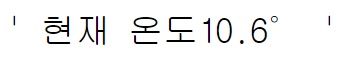

In [35]:
# 페이지 정보 받아오기

url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EB%84%A4%EC%9D%B4%EB%B2%84%EB%82%A0%EC%94%A8&oquery=%ED%95%98%EC%9D%B4%EB%B8%8C+%EB%B3%B5%EC%A7%80&tqi=iQ5OLlqpts0ssg2hx24ssssss00-077525'
req.get(url)

<Response [200]>

In [37]:
# 2. bs을 이용한 객체화(parsing)
res = req.get(url)
res

soup = bs(res.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="네이버날씨 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'네이버날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'네이버날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>네이버날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240307.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.ne

In [48]:
# 3. 태그 선택하기
soup.select("div.temperature_text")[0]

<div class="temperature_text"> <strong><span class="blind">현재 온도</span>10.6<span class="celsius">°</span></strong> </div>

In [ ]:
# 4. 컨텐츠 출력하기

In [52]:
a = soup.select("div.temperature_text")[0]
print(a.text.strip())

현재 온도10.6°
